## ¿Qué es _Machine Learning (ML)_?

**Primero** realizamos experimentos (ciencia), **después** desarrollamos productos (ingeniería)

Dos roles $\rightarrow$ dos flujos de trabajo:

- **diseñador** de algoritmos de ML $\rightarrow$ se enfoca en cómo se **genera un modelo**.
- **usuario** de algoritmos de ML $\rightarrow$ se enfoca que **calibrar modelos** respecto a unos datos concretos.


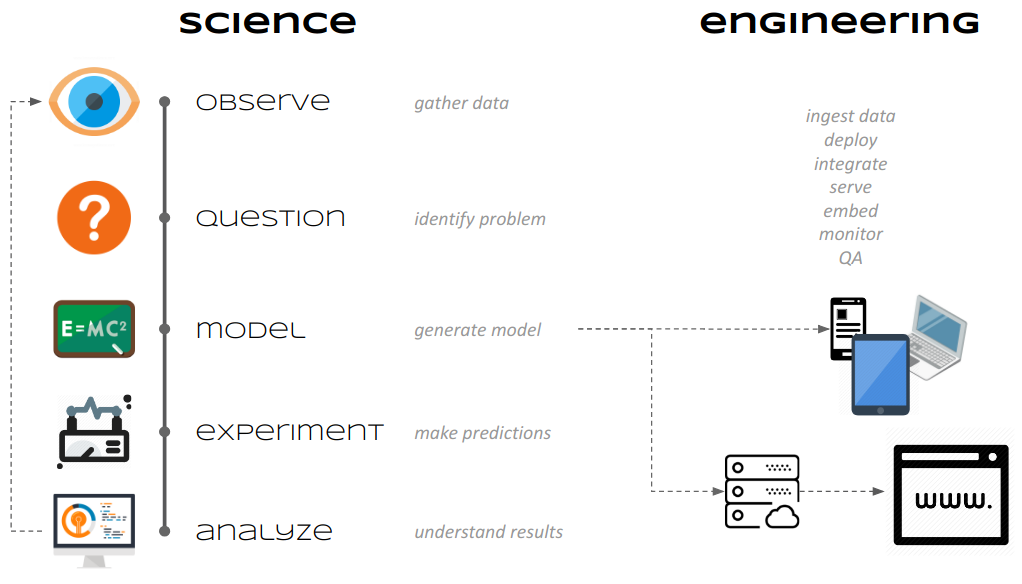

In [1]:
from IPython.display import Image
Image(filename='imgs/science_engineering.png', width=600)

# ¿Qué es un modelo derivado de los datos?

- en 2D, un modelo de clasificación **es una frontera** en el plano

- **supongamos** que tenemos acceso a las distribuciones de las que surgen los datos $\rightarrow$ podemos muestrear tantas veces como queramos

- ¿cuál es la frontera que produce menos error de clasificación?

- $\epsilon$ es el error de clasificación calculado analíticamente **con la frontera óptima** porque conocemos las distribuciones que generan los datos.
- $\hat{\epsilon}$ es el error de clasificacón calculado con la muestra de datos y **con la frontera óptima** (conocida también como _frontera bayesiana_).

In [2]:
import mlutils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%matplotlib inline


/opt/miniconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


/opt/miniconda/lib/python2.7/site-packages/scipy/stats/_multivariate.py:652: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


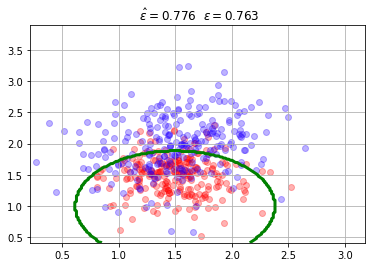

In [3]:
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[0.1, 0.], [0., 0.1]],
                                        mean1=[1.5, 2.], cov1=[[0.2,0.1],[0,.2]])
X,y = mc.sample(500)
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid();

haz los siguientes experimentos:

- separa los centros de las distribuciones de cada clase (`mean0`, `mean1`).
- aumenta y disminuye las matrices de covarianza.
- aumenta y disminuye el número de muestras.


- observa la estabilidad de $\hat{\epsilon}$ respecto a $\epsilon$ según ambas clases están más mezcladas o hay más o menos datos.

en general **SOLO TENEMOS UNA MUESTRA** de los datos, porque no tenemos conocimiento de las distribuciones que los generan. Los métodos de **estadística** y de **machine learning** están diseñados para esta situación.

Ejecuta la siguiente celda y pregúntate cada vez, **¿qué frontera establecerías con los datos que ves?**.

Fíjate que tenemos distintas muestras de una misma disitribución de base. Es decir, **la realidad detrás de estos datos siempre es la misma**.

**Aumenta** el número de muestras y hazte cada vez la misma pregunta.

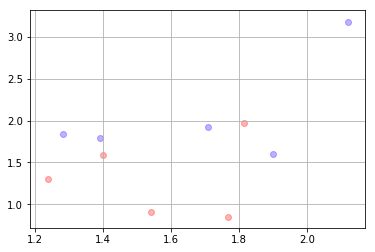

In [4]:
X,y = mc.sample(10)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
plt.grid()

### Los algoritmos de machine learning:

- Los algoritmos de clasificación **calculan fronteras** entre los datos.
- Parten de una muestra de los datos, **no de las distribuciones**.
- Por tanto, **no conocemos** la forma de la frontera bayesiana.

O sea, **partimos ciegos**!!!!!!!

Para abordar esta situación, **cualquier algoritmo** tiene necesariamente que plantear una alguna suposición de base:

- los datos vienen de distribuciones normales.
- las columnas son estadísticamente independientes.
- la frontera es lineal, o cuadrática.
- la frontera se representa con una red neuronal.

Teniendo esto en cuenta, y **partiendo de una muestra de los datos**:

- el objetivo de un usuario de ML es acercarse lo más posible a la **frontera bayesiana** (que no sabemos cómo es).
- distintos algoritmos ML tienen **distintas capacidades** para modelar fronteras (un clasificador lineal no puede captuarar una frontera cuadrática).
- necesitamos dos tipos de herramientas:
   - una buena colección de algoritmos ML.
   - métodos para saber qué tan cerca estamos de la frontera bayesiana.

### observa cómo un clasificador lineal aproxima la frontera con diferentes tamaños de muestras

- cambia el parámetro `n_samples` y experimenta con el siguiente código.
- usa luego estimadores distintos. P.ej.

        estimator = SVC(gamma=1)
        estimator = RandomForestClassifier()
        estimator = SVC(gamma=100)
        
Hazte las siguientes preguntas:

- ¿qué complejidad es capaz de capturar un estimador?

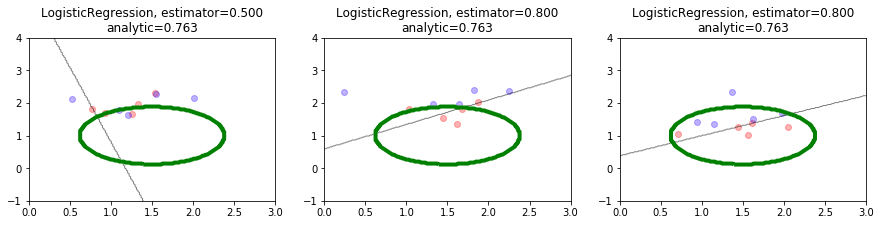

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
reload(mlutils)
n_samples = 10
estimator = LogisticRegression()
plt.figure(figsize=(15,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    mlutils.plot_estimator_border(mc, estimator, mins=[0,-1], maxs=[3,4], n_samples=n_samples, legend=False)

hacemos ahora el experimento más exhaustivo repitiendo 20 veces el siguiente proceso:

- se muestrea el dataset (recuerda que **excepcionalmente** tenemos acceso a las distribuciones que generan los datos y por tanto podemos hacer esto).
- se calcula la fronter de clasificación obtenida por el estimador usando el dataset muestreado.
- se pinta esta frontera (en negro).
- en verde se muestra la **frontera bayesiana**.

100% (4 of 4) |###########################| Elapsed Time: 0:00:01 Time: 0:00:01


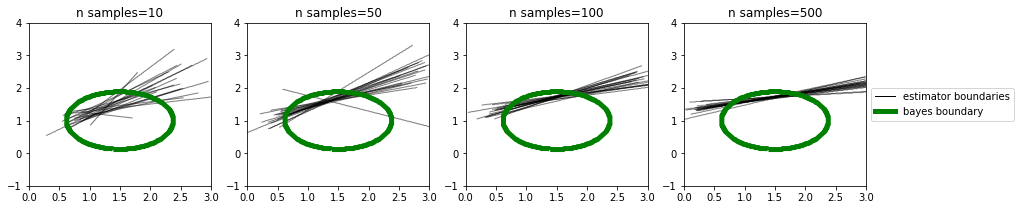

In [6]:
reload(mlutils)
mlutils.sample_borders(mc, estimator, samples = [10,50,100,500], n_reps=20, mins=[0,-1], maxs=[3,4])

## Solo tenemos un dataset

- remuestrea, reentrena para medir el desempeño y entender la estabilidad
- prueba con `test_pct` entre 0.1 y 0.9. observa la divergencia entre train y test cuando `test_pct` es más cercano a 0.9. ¿por qué?
- prueba con `SVC(gamma=100)`. En este caso observa la divergencia entre train y test incluso cuando `test_pct` es pequeño. ¿por qué?
- prubea además con `dataset_size` entre 20 y 500

Entiende la diferencia entre **tener pocos datos** y **overfitting**

Configuraciones interesantes sobre 

    mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[0.5, 0.1], [0.3, 0.5]],
                                            mean1=[1.2, 2.], cov1=[[0.2,0.1],[0,.5]])

- SVC $\gamma=100$, `dataset_size=500` (overfitting con pocos datos, convergencia con muchos)
- SVC $\gamma=100$, `dataset_size=2000` (overfitting con pocos datos, convergencia con muchos)
- SVC $\gamma=.01$, `dataset_size=100` (variabilidad siempre, convergencia promedio con pocos datos)
- SVC $\gamma=1$, `dataset_size=100` (variabilidad siempre, convergencia promedio con pocos datos)
- LinearRegression, `dataset_size=100` (nunca converge a la frontera bayesiana)



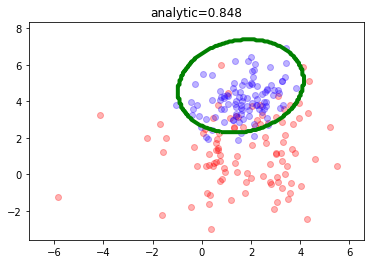

In [7]:
import mlutils
dataset_size = 200
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[4., 0.5], [0.1, 4.]],
                                        mean1=[1.5,4.], cov1=[[1,0.5],[0.1,1.]])
X,y = mc.sample(dataset_size)
mlutils.plot_estimator_border(mc, n_samples=dataset_size, legend=False)
analitic_score = mc.analytic_score()

realizamos un muestreo para dividir entre train y test

In [9]:
test_pct = .3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(140, 2) (140,)
(60, 2) (60,)


Text(0.5,1,'test data')

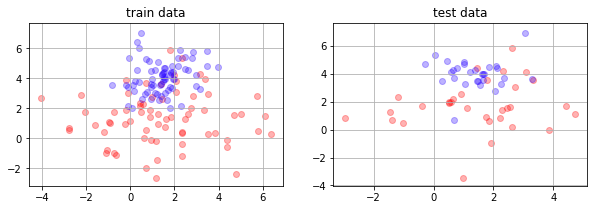

In [10]:
plt.figure(figsize=(10,3))
plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
plt.title("train data")
plt.grid()
plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
plt.grid()
plt.title("test data")

In [11]:
#estimator = SVC(gamma=1)
estimator = SVC(gamma=10)
#estimator = LogisticRegression()
estimator.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
print "accuracy train %.2f"%estimator.score(X_train,y_train)
tr_preds = estimator.predict(X_train)
print "predicciones para train"
print tr_preds
print "ground truth para train"
print y_train

print "\naccuracy test %.2f"%estimator.score(X_test,y_test)
ts_preds = estimator.predict(X_test)
print "predicciones para test"
print ts_preds
print "ground truth para test"
print y_test

accuracy train 0.95
predicciones para train
[0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
ground truth para train
[0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.]

accuracy test 0.82
predicciones para test
[0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1

In [13]:
np.min(X, axis=0)

array([-4.0599672 , -3.47950761])

train_score  0.94
test_score   0.75


(0.872875, 0.127125)

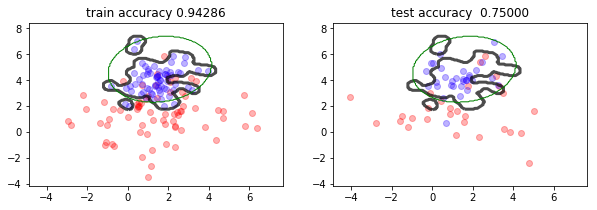

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
estimator.fit(X_train, y_train)
trsc = estimator.score(X_train, y_train)
tssc = estimator.score(X_test, y_test)
print "train_score %5.2f"%estimator.score(X_train, y_train)
print "test_score  %5.2f"%estimator.score(X_test, y_test)

plt.figure(figsize=(10,3))
plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.title("train accuracy %.5f"%estimator.score(X_train, y_train))

mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=1, line_alpha=1., line_color="green", label="bayes boundary")

plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.title("test accuracy  %.5f"%estimator.score(X_test, y_test))
mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=1, line_alpha=1., line_color="green", label="bayes boundary")


## Multidimensionalidad (>2D)

normalmente tenemos datasets de muchas dimensiones (columnas) y no podemos visualizar los datos como en 2D $\rightarrow$ necesitamos métodos para recabar evidencia sobre si tenemos pocos datos, estamos haciendo overfitting, etc.

Las **curvas de aprendizaje** nos ayudan a esto.

Realiza el experimento desde la sección anterior, con distintos tamaños del dataset inicial y con distintos algoritmos.

100% (9 of 9) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


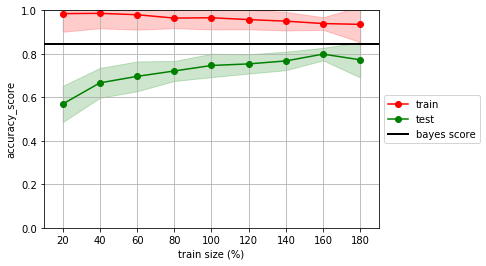

In [15]:
#estimator = LogisticRegression()
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

100% (9 of 9) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


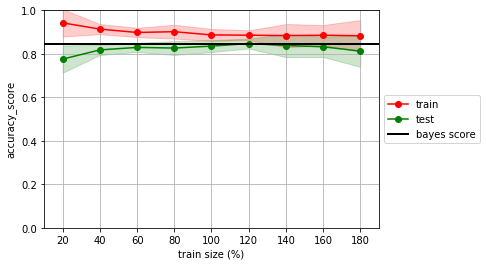

In [16]:
estimator = SVC(gamma=1)
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

100% (9 of 9) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


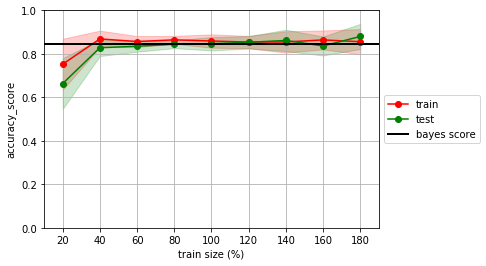

In [17]:
estimator = SVC(gamma=.01)
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

no olvides que normalmente **no conocemos la _frontera bayesiana_**, y por tanto no tenemos el _bayes score_

## Taxonomía de problemas de machine learning

- Supervisados
   - Clasificación
   - Regresión
- No supervisados
   - Agrupamiento
   - Estimación de densidad
   - etc.
- Reinforcement learning


## Complejidad de los modelos vs. complejidad de los datos

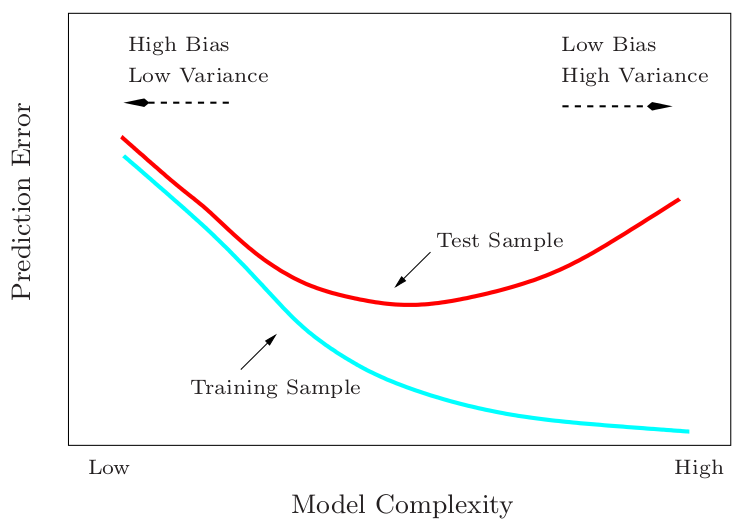

In [18]:
Image(filename='imgs/bvc.png', width=600)
